# Data 2 Work Along Project

Welcome to Data 2! This notebook is a work-along project that your mentors will spend time going over each week. It will relate to the syllabus as well and will meet the project requirements so you have an idea of what we're asking you to do in advance. Please feel free to reach out to the Code Louisville staff or your mentors if you have any questions at all, and happy coding!

------------

## Purpose

The purpose of this sample "project" is to guide you through data exploration and cleaning. While you'll see quite a few techniques and code snippets that would help you meet your project requirements, your project should have a central research question that you're seeking to answer. For example, if you were working with weather data, you could ask "Has the temperature during the last 3 years changed compared to the last 100 years?" or something to that effect. Your mentors can help you choose a question to answer so that it's not too narrow or broad in scope, as well as help you choose a data set.

------------

## Week 0 - Project Set Up 

Throughout the project, there will be short interactive components at the end of each week. We want you to be able to add your own code to the notebook, so to do this and save your changes, follow the instructions below: 

1. In the top left, click ```File``` → ```Download``` → ```Download as .ipynb```
2. This will probably go to the  ```Downloads``` folder on your PC, so move it into whatever folder you're going to be programming out of, and open the notebook. 
3. If you're not sure how that works, [here's how to open a jupyter notebook](https://jupyter-notebook-beginner-guide.readthedocs.io/en/latest/execute.html) and [here](https://www.computerhope.com/jargon/d/director.htm) is a more general lesson on directory structures. 
**OR** 

1. You can simply copy this CoLab Jupyter Notebook into your own Google drive so you can modify it in the browser. If you don't have a Google account, you can make one for free. 
2.  In the top left go to ```File``` → ```Save a copy in Drive``` 
3. It should get dropped into a new folder called ```Colab Notebooks``` in your drive. If you haven't used Google Drive before, check [here for instructions](https://support.google.com/drive/answer/2424384?hl=en&co=GENIE.Platform%3DDesktop)

With either of these options, you'll be able to modify and add code. 

------------



## Week 3 - Loading our Data

Instead of working with physical files, let's work with APIs for our dataset. If you're familiar with them, great, but if not, don't worry! Check out the article [here](https://realpython.com/python-api/) for a good overview on using them in Python. It is essentially a way to query a website for data programmatically so that you're not constantly uploading new data from files. I am far from an expert on them, but you really don't have to be to get your data loaded in. I found an API of fiscal data from the U.S. Treasury at the links below, so we'll use that for the project.  

[List of U.S. Treasury endpoints](https://fiscaldata.treasury.gov/api-documentation/#list-of-endpoints)

[And here's the metadata about the collection of tables that our table is located in](https://fiscaldata.treasury.gov/datasets/treasury-report-on-receivables/treasury-report-on-receivables-full-data) (Note: we're using the delinquent debt endpoint)

In [ ]:
#installing because it's not included in CoLab
!pip install pandasql

import pandas as pd 
import numpy as np 
import seaborn as sns 
import requests
from pandasql import sqldf
import matplotlib.pyplot as plt
from bokeh.io import output_notebook
from bokeh.plotting import figure, show
from bokeh.transform import factor_cmap, factor_mark
from scipy.stats import linregress 

APIs have a base URL and an endpoint - the endpoint is the "table" of data that we want, and you can get many different "tables" from the base URL. Honestly, I just looked at the documentation at the links above and found these. Fortunately, most APIs will have pretty good developer documentation and will just give you the information you need to pull from them.

This API also did not require authentication, which is nice so that you all can run this later if you need to. Most do require an API key (which you should never upload to GitHub), which is almost always free to sign up for, but just takes a few more steps.

The ```requests``` library is by far the most common in Python to interact with APIs, which I've used below. We just concatenated the strings and we're on our way. The ```<Response [200]>``` means we queried successfully. 

In [ ]:
base = 'https://api.fiscaldata.treasury.gov/services/api/fiscal_service'
endpoint = '/v2/debt/tror/delinquent_debt'

r = requests.get(base+endpoint)
r

<Response [200]>

We can use ```.json()``` from our response object to get the data, which in this case returns a Python dictionary.

In [ ]:
print(type(r.json()))
print(r.json().keys())

<class 'dict'>
dict_keys(['data', 'meta', 'links'])


Further, because this is a dictionary, we can get the keys using ```dict.keys()``` - then, we know that we want everything that's under the ```data``` key!

In [ ]:
df = pd.DataFrame(data = r.json()['data'])
print("The rows and columns of our dataframe:", df.shape)

The rows and columns of our dataframe: (100, 142)


I typically will view the top few rows of the data using ```df.head()``` just to see what we're working with.

In [ ]:
df.head()

,record_date,receivable_type_description,receivable_type_id,funding_type_description,funding_type_id,ddebt_1_to_30_days_amt,ddebt_1_to_30_days_cnt,ddebt_31_to_60_days_amt,ddebt_31_to_60_days_cnt,ddebt_61_to_90_days_amt,...,cs_expt_ref_cnt,cs_referred_total_amt,cs_referred_total_cnt,src_line_nbr,record_fiscal_year,record_fiscal_quarter,record_calendar_year,record_calendar_quarter,record_calendar_month,record_calendar_day
0,2016-12-31,Administrative Receivables,A,Non-CFO,02,1084231039,9085,361978259,3239,262837244,...,-18259,66530529,19198,1,2017,1,2016,4,12,31
1,2016-12-31,Administrative Receivables,A,CFO,03,1481470501,624680,714147110,254674,1493975431,...,-2140260,1822889316,6448466,2,2017,1,2016,4,12,31
2,2016-12-31,Direct Loans,D,Non-CFO,02,4634267,7,114224,1,912379,...,-60,0,0,3,2017,1,2016,4,12,31
3,2016-12-31,Direct Loans,D,CFO,03,404128304,6254026,384012695,3472610,467802147,...,-50740,11786867,92,4,2017,1,2016,4,12,31
4,2016-12-31,Defaulted Guaranteed Loans,F,Non-CFO,02,5001625,10,192485,4,3153258,...,0,0,0,5,2017,1,2016,4,12,31


Great! Our data is loaded in.

## Week 3 Homework Challenge

We're going to have short homework challenges at the end of each week, ideally spend about 30m - 1 hour on these and then you can discuss them in class. 

For your first challenge, choose an API that **requires an API key**. This is a kind of authentication that some APIs require for security. Here's a list of APIs, https://github.com/public-apis/public-apis. You'll notice under "Auth" many of them say ```apiKey``` meaning they'll require a key. 

This is in contrast to what I did above - I didn't have to supply a key at all! You'll probably have to sign up for an account on the respective API to create / use a key, but this will be free.

Some of the "better" or more constantly updated data sources will require you to pay for an API key. For example, very up to date finance data is sometimes a paid API key (i.e. stock data that updates every minute etc.) but don't pay for an API key for this exercise. The API that you choose will most likely have an example written in Python that will show you how to create and utilize a key. Go explore the API documentation and see if you can figure it out!



## Week 4 - Selecting and Querying

Let's do a little review on selecting our data. The easiest way is to make a mask and sub-select your data with it, which you can read more about [here](https://jakevdp.github.io/PythonDataScienceHandbook/03.02-data-indexing-and-selection.html). The way a mask works is that it evaluates each item for "truthiness" then that is placed in square brackets to filter out items from your dataframe that you don't want. 

We can also use ```df.query()``` which, according to the Data Science book above, can be faster in some cases. We can actually check, though, whether something is faster or not using Jupyter cell magic, indicated by the ```%%``` at the top of the cell. 

In [ ]:
mask = df['record_date'] == '2020-12-31'

In [ ]:
%%timeit -n 100

mask = df['record_date'] == '2020-12-31'
df[mask]

100 loops, best of 5: 291 µs per loop


In [ ]:
mask[94:] # last few items of the mask

94    False
95    False
96     True
97     True
98     True
99     True
Name: record_date, dtype: bool

In [ ]:
print(type(mask))
print("The data type of this is: ", mask.dtypes)

<class 'pandas.core.series.Series'>
The data type of this is:  bool


In [ ]:
%%timeit -n 100

df.query('record_date == "2020-12-31"')

100 loops, best of 5: 4.9 ms per loop


So it seems like the mask was a lot faster in our scenario, but you also have the query option if you find that syntax easier to read. You can also start to chain operations together like I have below, using logical ```AND``` and ```OR``` operators, in pandas those are ```|``` for ```OR``` and ```&``` for ```AND```. (NOTE: In regular Python, these are [bitwise operators](https://wiki.python.org/moin/BitwiseOperators) and NOT logical operators and will not behave the same way.)

Below, I'm saying "Give me everything with a date of 2020-12-31 OR 2018-12-31." In a few weeks we'll talk about SQL, but if you already know some, here's what the equivalent SQL would look like: 

```SQL
SELECT * 
FROM df
WHERE record_date = '2020-12-31'
OR record_date = '2018-12-31'
```

Same exact thing, there are just a ton of different ways to write it.

In [ ]:
or_mask = (df['record_date'] == '2020-12-31') | (df['record_date'] == '2018-12-31')
df[or_mask]

,record_date,receivable_type_description,receivable_type_id,funding_type_description,funding_type_id,ddebt_1_to_30_days_amt,ddebt_1_to_30_days_cnt,ddebt_31_to_60_days_amt,ddebt_31_to_60_days_cnt,ddebt_61_to_90_days_amt,...,cs_expt_ref_cnt,cs_referred_total_amt,cs_referred_total_cnt,src_line_nbr,record_fiscal_year,record_fiscal_quarter,record_calendar_year,record_calendar_quarter,record_calendar_month,record_calendar_day
48,2018-12-31,Administrative Receivables,A,Non-CFO,02,65677264,5263,96380298,5248,130628105,...,-54208,17664985,2076,1,2019,1,2018,4,12,31
49,2018-12-31,Administrative Receivables,A,CFO,03,1846800641,1392713,893535690,528398,1167711377,...,-4081395,1357715228,5064726,2,2019,1,2018,4,12,31
50,2018-12-31,Direct Loans,D,Non-CFO,02,4983198,13,1925656,3,43,...,-59,0,0,3,2019,1,2018,4,12,31
51,2018-12-31,Direct Loans,D,CFO,03,496218062,6737420,435869902,3343311,483729602,...,-41735,116378502,47,4,2019,1,2018,4,12,31
52,2018-12-31,Defaulted Guaranteed Loans,F,Non-CFO,02,984924,2,5510226,4,125275,...,0,0,0,5,2019,1,2018,4,12,31
53,2018-12-31,Defaulted Guaranteed Loans,F,CFO,03,318799319,205384,51232240,50463,1513401076,...,-83649,590634,13,6,2019,1,2018,4,12,31
96,2020-12-31,Administrative Receivables,A,Non-CFO,02,34116865,1441,289671958,859,86030365,...,-71656,52205811,8649,1,2021,1,2020,4,12,31
97,2020-12-31,Administrative Receivables,A,CFO,03,1486943880,1223104,802804748,332141,1036152449,...,-1370633,1206735147,1384630,2,2021,1,2020,4,12,31
98,2020-12-31,Direct Loans,D,Non-CFO,02,4591639,11,4019462,6,440420,...,-57,0,0,3,2021,1,2020,4,12,31
99,2020-12-31,Direct Loans,D,CFO,03,72978965,131817,52310630,75166,36119402,...,-46176,211656,111,4,2021,1,2020,4,12,31


In fact, there's a package called ```pandasql``` that you can use to write SQL queries on dataframes. In practice, I'm not sure that you would ever need to do this, but it will be a great tool to use to practice writing SQL and writing the equivalent pandas selection code.

In [ ]:
query = """
SELECT * 
FROM df
WHERE record_date = '2020-12-31'
OR record_date = '2018-12-31'
"""

sqldf(query)

,record_date,receivable_type_description,receivable_type_id,funding_type_description,funding_type_id,ddebt_1_to_30_days_amt,ddebt_1_to_30_days_cnt,ddebt_31_to_60_days_amt,ddebt_31_to_60_days_cnt,ddebt_61_to_90_days_amt,...,cs_expt_ref_cnt,cs_referred_total_amt,cs_referred_total_cnt,src_line_nbr,record_fiscal_year,record_fiscal_quarter,record_calendar_year,record_calendar_quarter,record_calendar_month,record_calendar_day
0,2018-12-31,Administrative Receivables,A,Non-CFO,02,65677264,5263,96380298,5248,130628105,...,-54208,17664985,2076,1,2019,1,2018,4,12,31
1,2018-12-31,Administrative Receivables,A,CFO,03,1846800641,1392713,893535690,528398,1167711377,...,-4081395,1357715228,5064726,2,2019,1,2018,4,12,31
2,2018-12-31,Direct Loans,D,Non-CFO,02,4983198,13,1925656,3,43,...,-59,0,0,3,2019,1,2018,4,12,31
3,2018-12-31,Direct Loans,D,CFO,03,496218062,6737420,435869902,3343311,483729602,...,-41735,116378502,47,4,2019,1,2018,4,12,31
4,2018-12-31,Defaulted Guaranteed Loans,F,Non-CFO,02,984924,2,5510226,4,125275,...,0,0,0,5,2019,1,2018,4,12,31
5,2018-12-31,Defaulted Guaranteed Loans,F,CFO,03,318799319,205384,51232240,50463,1513401076,...,-83649,590634,13,6,2019,1,2018,4,12,31
6,2020-12-31,Administrative Receivables,A,Non-CFO,02,34116865,1441,289671958,859,86030365,...,-71656,52205811,8649,1,2021,1,2020,4,12,31
7,2020-12-31,Administrative Receivables,A,CFO,03,1486943880,1223104,802804748,332141,1036152449,...,-1370633,1206735147,1384630,2,2021,1,2020,4,12,31
8,2020-12-31,Direct Loans,D,Non-CFO,02,4591639,11,4019462,6,440420,...,-57,0,0,3,2021,1,2020,4,12,31
9,2020-12-31,Direct Loans,D,CFO,03,72978965,131817,52310630,75166,36119402,...,-46176,211656,111,4,2021,1,2020,4,12,31


## Week 4 Homework Challenge

Try using a mask, like I did above, to select the following: 

1. Select all rows where ```funding_type_description```  is equal to ```CFO``` AND ```receivable_type_id``` is equal to ```A```. 

You might have to do a little digging to figure out how to chain the operations together like that. I haven't explained the AND operator yet, so you'll have to use whatever resources you have available to figure it out.

## Week 5 - Vector Operations

Here's a humorous error I got when I first tried summing the column ```ddebt_1_to_30_days_amt```. Instead of giving me the dollar sum, it added all of the strings together! This is a good example of a basic data cleaning task. You can use ```pd.astype()``` to change the type of a column. 

In [ ]:
df['ddebt_1_to_30_days_amt'].sum()

'108423103914814705014634267404128304500162588504336170990921182707910062766623431306761030182825895761099316491729136518158818033957872241081790793660392570581829167923825740584780468548152788273194741438752806291635583030339166305611650223230308699562960305346781624068459312948864817702593442232587714928835579715564143426369164446427705358276432694904319429638171373871095612577334766800219314327475040656772641846800641498319849621806298492431879931924211998317658031012153376245663823594023312554859527354879217343544682920089502607335360948357693131216190009017790697962165634831140708137865935765244608668520711575481994220486510148281572777727088147912759166394439004852684741637684689661349135256211787942491185556189541280955746825972268606680996061393770970112326682229484174238380111876282341168651486943880459163972978965'

In [ ]:
df['ddebt_1_to_30_days_amt'] = df['ddebt_1_to_30_days_amt'].astype(int)
df['ddebt_1_to_30_days_cnt'] = df['ddebt_1_to_30_days_cnt'].astype(int)

### Timing Your Python
Now that this works correctly, let's look at how you can make your pandas operations more efficient. The somewhat uninteresting answer is you should use as many pandas built-in functions and column operations as possible, these are called vectorized operations and will be much, much faster than manually looping over each value in a data frame with a lot of rows. Of course, that will still happen in milliseconds, but on large datasets will really slow you down. There are also may be scenarios where that's your only option, but let's look at some examples.

[Here's an article on fast Pandas](https://realpython.com/fast-flexible-pandas/)

[Here's a section from the Data Science book about fast string operations](https://jakevdp.github.io/PythonDataScienceHandbook/03.10-working-with-strings.html)

The main idea is that, if you can, you want to operate on the entire column or row at once. However, since our data set has a relatively small number of rows, it looks like the standard Python approach is a little faster! about 70 microseconds with the vectorized approach and 22 microseconds for the loop. Try these approaches and time them on your data set. You should find, contrary to my small example, that if you have a huge DataFrame it will be much faster to use the Pandas built-in operations. I suspect this has to do with the initial computational "cost" of using a DataFrame.

In [ ]:
%%timeit 

df['ddebt_1_to_30_days_amt'] * 2

The slowest run took 4.24 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 5: 183 µs per loop


In [ ]:
%%timeit 

for i in df['ddebt_1_to_30_days_amt']:
    i * 2

10000 loops, best of 5: 46.4 µs per loop


We can try again with a string operation. Turns out, our list comprehension is faster at about 27 microseconds vs. 142 microseconds for the vectorized approach. 

Both of these examples are a good illustration that you should try different approaches when writing code! Some solutions will be more readable, some will be faster, and some will be both. Try some of these computations on your own data set and see how long it takes.

In [ ]:
%%timeit
df['receivable_type_description'].str.upper()

1000 loops, best of 5: 472 µs per loop


In [ ]:
%%timeit
container = [i.upper() for i in df['receivable_type_description']]

10000 loops, best of 5: 46.4 µs per loop


Here are a couple quick examples of computing values with your dataframe:

The current ```ddebt_1_to_30_days_amt``` has pretty large numeric values that are a bit hard to read. We can divide by 1,000,000 to make it a little easier to read them. Also note that I sliced the Series using ```[0:5]``` just to show a little of what it looks like. Otherwise, the operation wouldn't print anything below the cell. 

In [ ]:
df['1_to_30_millions'] = df['ddebt_1_to_30_days_amt'] / 1000000
df['1_to_30_millions'][0:5]

0    1084.231039
1    1481.470501
2       4.634267
3     404.128304
4       5.001625
Name: 1_to_30_millions, dtype: float64

I'm sure you've seen this in your lessons already, but here's an example of dividing one column by another. This will take the item in each row and divide ```df['ddebt_1_to_30_days_amt']``` in the numerator by ```df['ddebt_1_to_30_days_cnt']```. Since the data dictionary told us the ```amt``` column was a total and the ```cnt``` column was a count of the number of bad debt receivables, we can find a sort of average per receivable. This is also just the actual dollars, not in millions like we did above. 

In [ ]:
df['1_to_30_unit_amount'] = df['ddebt_1_to_30_days_amt'] / df['ddebt_1_to_30_days_cnt']
df['1_to_30_unit_amount'][0:5]

0    119342.987232
1      2371.567044
2    662038.142857
3        64.618904
4    500162.500000
Name: 1_to_30_unit_amount, dtype: float64

That's it for now! Try some of these operations, or find other Pandas operations online, and try them on your data set. You'll learn a lot by trying new things. 

## Week 5 Homework Challenge 

The purpose of this is to show you there are a variety of functions you might not be familiar with built in to Numpy, but you can easily figure out how they work. You can read more about these universal functions, ufuncs, [here](https://numpy.org/doc/stable/reference/ufuncs.html). You'll see that these are already vectorized, so they'll be faster than what you'd be able to calculate by hand. 

Add new columns to ```df``` called ```sin_ddebt``` and ```cos_ddebt```. Make these the cosine and sine values of the column ```df['ddebt_1_to_30_days_amt']```. This isn't necessarily a meaningful calculation, since we're not working with angles, but we're using it for the sake of learning. 

Next, find the minimum of the ```sin_ddebt``` column and the max of ```cos_ddebt```. You'll notice these are not entire columns of data, unlike the previous functions, because those perform calculations element-wise. Meaning, they just calculate a value for every cell. The max and min will scan every value and return a single number (called a scalar) that is the largest and smallest value in the column, respectively. Just print the min and max below for these new columns you created.



In [ ]:
# find the help() on these. 
# can use help() or ??<function> in Jupyter Notebook for this
np.sin
np.cos

#two more to try 
np.max
np.min

In [ ]:
df['sin_ddebt'] = # add your code here!
df['cos_ddebt'] = # add the cosine function here 

In [ ]:
#find the minimum of the new sin_ddebt column
#and the max of the new cos_ddebt column
np.min()
np.max()

## Week 6 - Cleaning

We already saw some basic cleaning tasks above, like converting strings to numbers. We used this: 

```python
df['ddebt_1_to_30_days_amt'] = df['ddebt_1_to_30_days_amt'].astype(int)
df['ddebt_1_to_30_days_cnt'] = df['ddebt_1_to_30_days_cnt'].astype(int)
```

This is fine, but we have over a hundred columns that probably have this issue! This is a very real problem you might run across while working with data, so let's see if we can make a more dynamic approach to converting them that doesn't involve doing that line by line. 

First, we can pull the column names out of the DataFrame with the ```.columns``` attribute.

In [ ]:
#pull the columns out into a pandas series
col_names = df.columns
col_names[0:5]

Index(['record_date', 'receivable_type_description', 'receivable_type_id',
       'funding_type_description', 'funding_type_id'],
      dtype='object')

Great, I showed a small selection of them, but there are a ton. Instead of finding their names by slicing, we can use Pandas regex feature to string match. Fortunately, we have a pretty easy task of just finding things that contain ```cnt``` or ```amt```. I'm not that great with regex, but all we need to do in this case is enter the values we want to find in a string separated by the regex ```or``` operator, which is the same in Pandas, just a pipe like this: ```|```


There may be others that need to be corrected, but we're pretty positive that those columns contain numeric data based on what we saw earlier. [Here](https://kanoki.org/2019/11/12/how-to-use-regex-in-pandas/) is an article I was referencing while working on this. 

In [ ]:
mask = col_names.str.contains('cnt|amt')
col_names[mask]

Index(['ddebt_1_to_30_days_amt', 'ddebt_1_to_30_days_cnt',
       'ddebt_31_to_60_days_amt', 'ddebt_31_to_60_days_cnt',
       'ddebt_61_to_90_days_amt', 'ddebt_61_to_90_days_cnt',
       'ddebt_91_to_120_days_amt', 'ddebt_91_to_120_days_cnt',
       'ddebt_121_to_150_days_amt', 'ddebt_121_to_150_days_cnt',
       ...
       'cs_expt_returned_amt', 'cs_expt_returned_cnt', 'cs_expt_other_amt',
       'cs_expt_other_cnt', 'cs_expt_req_ref_amt', 'cs_expt_req_ref_cnt',
       'cs_expt_ref_amt', 'cs_expt_ref_cnt', 'cs_referred_total_amt',
       'cs_referred_total_cnt'],
      dtype='object', length=130)

Woohoo! We found them. At this point, we may want to use this with other data sets, so we can try putting it into a function.

In [ ]:
def convert_to_num(df: pd.DataFrame,column_contains_str: str) -> None:
  """

  Converts target columns in the DataFrame that match the regex entered as 
  the argument "column_contains_str"

  Parameters:
  ----------
  df : DataFrame object
  column_contains_str : str, Regular Expression

  Returns:
  ----------
  None 

  """
  col_names = df.columns
  mask = col_names.str.contains(column_contains_str)
  col_to_convert = col_names[mask]

  for i in col_names[mask]:
    df[i] = df[i].astype(int)

In [ ]:
convert_to_num(df, 'cnt|amt')

Here's the display of the first few data types, I converted this to a list just because that displays a little bit easier in CoLab for some reason, but this just shows the datatypes. 

In [ ]:
list(df.dtypes)[0:10]

[dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64')]

I'm actually really glad this worked, that was pretty concise and shows a good example of why you might need a function rather than just a collection of commands. We can walk through the function now: 

Here's how we start our function, with a couple arguments. You might notice those funny colons in the arguments - those are relatively new in Python, and I need to use them more, so I'm including them here. They're type hints, common in other languages, but not so much yet in Python. All we're saying is that the first argument is supposed to be a DataFrame and the second a string, and it returns None; this is nice because you can quickly glance at it and figure out what kind of arguments you're supposed to supply. Read more [HERE](https://docs.python.org/3/library/typing.html)
```python 
def convert_to_num(df: pd.DataFrame,column_contains_str: str) -> None:
```

We built this above line by line - we just found the columns, then made a mask using our regex, then passed that mask to ```col_names```. You might notice that ```col_names``` looks a lot like a list, but is actually a Pandas Series, so we can index it like we did below.

```python 
  col_names = df.columns
  mask = col_names.str.contains(column_contains_str)
  col_to_convert = col_names[mask]
```

You might be able to do this a different way, but a loop seemed the most convenient to me since we wanted to rename a bunch of columns. Here, we just go through everything in ```col_names[mask]``` which are our "target" columns to change. Then, we use that same syntax to change the data type that we saw earlier.

```python
  for i in col_names[mask]:
    df[i] = df[i].astype(int)
```

That's it for now! Hopefully that showed you a good example of when you might want to "functionalize" something. In our case, if we wanted to look at the other hundred or so data sets that the U.S. Treasury supplies, we sure wouldn't want to type that loop up 100 times, much less change the data type of 1000 columns. 

Try cleaning some of your data! You can do any number of tasks like filling in null values, zeros, cleaning up strings, cleaning up column names, or any number of things. 

## Week 6 Homework Challenge

This is going to be a bit of a tough challenge but I think you can do it! I want you to write a function that accepts either a dataframe column or a whole dataframe, and does **ANY** kind of cleaning operation on it. [Here's](https://www.tableau.com/learn/articles/what-is-data-cleaning#:~:text=Data%20cleaning%20is%20the%20process,to%20be%20duplicated%20or%20mislabeled.) an article from Tableau about the different steps of cleaning data. 

You can do really anything you want - write a custom function that removes null values where some other value is true, you could choose to format values a certain way, you could combine a few columns to give you a new metric (for example, the last several columns in our dataframe have day, month, year values. You could combine those), or anything else you think is interesting. 

You can also do this with the existing dataset we have loaded in, or if you've picked one out for your project, you can add this function to your final project for the class!

In [ ]:
#edit this function however you like to do some type of cleaning
def custom_cleaning_func(arguments):
  pass 

## Week 7 - Concatenating and Merging Your Data

The idea of joining your data can be somewhat confusing at first. I learned by looking at a venn diagram (and writing lots of SQL) which you can see [here](https://stackoverflow.com/questions/13997365/sql-joins-as-venn-diagram) although apparently there's heated debate over the topic of venn diagrams. If the first article didn't click, you can try [this article instead](https://towardsdatascience.com/you-should-use-this-to-visualize-sql-joins-instead-of-venn-diagrams-ede15f9583fc).  

Regardless of the visuals, the best way to learn it is just to see some examples. Because our data set is huuuuuge, I'm just going to pull off a few rows and columns as an example. Joins are common when you're working with large databases with dozens of tables that have different pieces of information.

In Knowledge Check 3, you'll see an example of a join with data that I made up, so let's try using actual data from the U.S. Treasury. This new table contains info about the collections outstanding and receivable owed to the federal government.

In [ ]:
#we need a new endpoint for a new table we want to join onto our existing table 
collected_debt = '/v2/debt/tror/collected_outstanding_recv'

#get the response object 
r_collect = requests.get(base+collected_debt)
collected_df = pd.DataFrame(data = r_collect.json()['data'])

#load the response object into a dataframe 
#I dropped most of the columns just for the sake of illustrating a join 
collected_df = collected_df.iloc[0:5,0:7]
collected_df.head()

,record_date,receivable_type_description,receivable_type_id,funding_type_description,funding_type_id,beginning_fiscal_year_amt,beginning_fiscal_year_cnt
0,2016-12-31,Administrative Receivables,A,Non-CFO,02,19684071206,69482
1,2016-12-31,Administrative Receivables,A,CFO,03,85352984753,63884192
2,2016-12-31,Direct Loans,D,Non-CFO,02,28829418791,792
3,2016-12-31,Direct Loans,D,CFO,03,1192735155287,169707929
4,2016-12-31,Defaulted Guaranteed Loans,F,Non-CFO,02,1407991356,1112


In [ ]:
sample_df = df.iloc[0:5,0:7]
sample_df

,record_date,receivable_type_description,receivable_type_id,funding_type_description,funding_type_id,ddebt_1_to_30_days_amt,ddebt_1_to_30_days_cnt
0,2016-12-31,Administrative Receivables,A,Non-CFO,02,1084231039,9085
1,2016-12-31,Administrative Receivables,A,CFO,03,1481470501,624680
2,2016-12-31,Direct Loans,D,Non-CFO,02,4634267,7
3,2016-12-31,Direct Loans,D,CFO,03,404128304,6254026
4,2016-12-31,Defaulted Guaranteed Loans,F,Non-CFO,02,5001625,10


Now let's combine them. The easiest way is if you have some kind of unique string of characters or number, like a tax ID, to join on something. However, here, we have a date, and then a few identifying columns like ```receivable_type_description``` and ```funding_type_id```. We probably don't actually *need* all of them to successfully join since something like the ```receivable_type_description```, ```record_date```, and ```funding_type_description``` would make a unique combination of keys anyway, but we can use all the keys we have. 

In [ ]:
combined = sample_df.merge(collected_df, 
                           how='left', 
                           on=['record_date','receivable_type_description',
                               'receivable_type_id','funding_type_description',
                               'funding_type_id'])
combined

,record_date,receivable_type_description,receivable_type_id,funding_type_description,funding_type_id,ddebt_1_to_30_days_amt,ddebt_1_to_30_days_cnt,beginning_fiscal_year_amt,beginning_fiscal_year_cnt
0,2016-12-31,Administrative Receivables,A,Non-CFO,02,1084231039,9085,19684071206,69482
1,2016-12-31,Administrative Receivables,A,CFO,03,1481470501,624680,85352984753,63884192
2,2016-12-31,Direct Loans,D,Non-CFO,02,4634267,7,28829418791,792
3,2016-12-31,Direct Loans,D,CFO,03,404128304,6254026,1192735155287,169707929
4,2016-12-31,Defaulted Guaranteed Loans,F,Non-CFO,02,5001625,10,1407991356,1112


Great, that worked. You can see that we added two columns to the end using a ```left``` join. This is kind of join is fairly straightforward and is really common, so it's a good one to start with. 

Now say we want to know what percentage of the beginning fiscal year receivable debt is delinquent from 1 to 30 days. We also actually need that function again that we wrote to convert the types, which is nice that we have it.

In [ ]:
convert_to_num(combined, 'cnt|amt')

combined['1_to_30_percentage_amount'] = combined['ddebt_1_to_30_days_amt'] / combined['beginning_fiscal_year_amt']
combined['1_to_30_percentage_count'] = combined['ddebt_1_to_30_days_cnt'] / combined['beginning_fiscal_year_cnt']

combined[['receivable_type_id','funding_type_id','1_to_30_percentage_amount','1_to_30_percentage_count']]

,receivable_type_id,funding_type_id,1_to_30_percentage_amount,1_to_30_percentage_count
0,A,02,0.055082,0.130753
1,A,03,0.017357,0.009778
2,D,02,0.000161,0.008838
3,D,03,0.000339,0.036852
4,F,02,0.003552,0.008993


Awesome, we joined another data set and we can say that of the total receivable debt for the federal government on 12-31-2016, of receivable type A and funding type 2 (whatever that means...) that about 5.5% of it was 1 to 30 days past due and that was 13% of the number of outstanding receivables. Cool!

## Week 7 Homework Challenge

We did a ```merge()``` above, which is equiavalent to a SQL ```join```. For your homework, try doing a pandas ```concat()``` [(docs here)](https://pandas.pydata.org/docs/reference/api/pandas.concat.html) which is equivalent to a SQL ```union```.

With this, we're going to place one dataframe on top of another rather than side by side. For this to work (and to make sense) the columns need to have identical names. In addition, if you're just combining things indiscriminately, you might forget what data is coming from what source. Here's what you need to do: 

1. change the names of the columns of both ```sample_df``` and ```collected_df``` to match. 
2. Add a new column to each dataframe called ```source``` that identifies which dataframe it is. When you union / concatenate them later, you'll want to know the source. It could be something like "debts collected" for ```collected_df```. 
3. Concatenate the modified dataframes so you can see one on top of the other. If this were your data, is this a choice you would make? It might be a little confusing if you have all the dollars in one column, BUT, it might be more convenient to query this new single table and setting a ```where source = 'debts collected'``` rather than trying to query from multiple tables every time you needed several different values. It's probably a personal preference and depends on what data you're working with!
4. When you complete the steps above, you should no longer see the ```np.NaN``` values in the newly-unioned/concatenated dataframe.

In [ ]:
#here's a little visual to show how most of the colums match 
#but the last two sets of names do not
sample_columns = pd.DataFrame(data=[sample_df.columns,collected_df.columns])
sample_columns = sample_columns.T
sample_columns 

,0,1
0,record_date,record_date
1,receivable_type_description,receivable_type_description
2,receivable_type_id,receivable_type_id
3,funding_type_description,funding_type_description
4,funding_type_id,funding_type_id
5,ddebt_1_to_30_days_amt,beginning_fiscal_year_amt
6,ddebt_1_to_30_days_cnt,beginning_fiscal_year_cnt


In [ ]:
#This isn't quite correct. Do you see why? 
pd.concat([sample_df,collected_df])

,record_date,receivable_type_description,receivable_type_id,funding_type_description,funding_type_id,ddebt_1_to_30_days_amt,ddebt_1_to_30_days_cnt,beginning_fiscal_year_amt,beginning_fiscal_year_cnt
0,2016-12-31,Administrative Receivables,A,Non-CFO,02,1084231039,9085,NaN,NaN
1,2016-12-31,Administrative Receivables,A,CFO,03,1481470501,624680,NaN,NaN
2,2016-12-31,Direct Loans,D,Non-CFO,02,4634267,7,NaN,NaN
3,2016-12-31,Direct Loans,D,CFO,03,404128304,6254026,NaN,NaN
4,2016-12-31,Defaulted Guaranteed Loans,F,Non-CFO,02,5001625,10,NaN,NaN
0,2016-12-31,Administrative Receivables,A,Non-CFO,02,NaN,NaN,19684071206,69482
1,2016-12-31,Administrative Receivables,A,CFO,03,NaN,NaN,85352984753,63884192
2,2016-12-31,Direct Loans,D,Non-CFO,02,NaN,NaN,28829418791,792
3,2016-12-31,Direct Loans,D,CFO,03,NaN,NaN,1192735155287,169707929
4,2016-12-31,Defaulted Guaranteed Loans,F,Non-CFO,02,NaN,NaN,1407991356,1112


## Week  8 - Plotting

Let's make some plots! The syntax can be a bit tricky, and there a quite a few libraries you can use, so we'll explore a few of them over the next couple weeks just to show you some options. 

You can also "subset" your data before you plot it, meaning you pull off part of it into another dataframe or selection before plotting it, or you can use the plotting libraries to choose part of the set to plot. We'll look at both examples, but this first example is a good excuse to show some SQL.

We have two queries below. They're almost identical except for the ```WHERE``` clause where we select a different ```funding_type```. You could simplify this and put it into one query with the condition:

``` 
WHERE receivable_type_id in ('03','02')
```

but honestly sometimes it's a little easier to write a few different queries than try to cram everything into one. 

In [ ]:
#funding type 03
query_type_3 = """
SELECT
  record_date,
  ddebt_1_to_30_days_amt 
FROM df 
WHERE 
  receivable_type_id = 'A' AND 
  funding_type_id = '03'
"""

#funding type 02 
query_type_2 = """
SELECT
  record_date,
  ddebt_1_to_30_days_amt 
FROM df 
WHERE 
  receivable_type_id = 'A' AND 
  funding_type_id = '02'
"""

df_type_2 = sqldf(query_type_3)
df_type_3 = sqldf(query_type_2)

Great, so we have selections from our data, now we can plot them with Seaborn. I partially followed the examples [HERE](https://seaborn.pydata.org/examples/palette_choices.html) to start building the plots. Please don't be afraid to follow examples when plotting, that's why they have extensive galleries. 

Since you had some basic figures in Data 1, let's combine a few plots for a more complicated example and start fiddling with some of the options. The **big** strength in plotting with Python is you have fine control over almost every option. The challenge is that it's kind of difficult. 

1. We start by initializing the figure and axes we want to plot on, denoted ```f```, ```ax1```, and ```ax2```. Then, we pull some data off of our dataframe, here we chose the ```record_date``` along with debts of receivable type 02 and 03. 
2. Next, we overlay plots on the respective axes. I actually plotted the two bar charts first, then thought it would be interesting to overlay the second plot over the first one as a line plot to show how they compared at different points in time. 
3. Last, I formatted things like the figure title, tick mark labels, and rotated the ```record_date``` x-axis at the bottom. 

This is actually pretty useful for interpretation. It shows that type 02 debts remained relatively stable over the time period measured, while type 03 had an enormous jump around 2018-09-30. Plots can be great to point you into the next direction that you might want to investigate your dataset, so obviously you would want to check out that time period. 



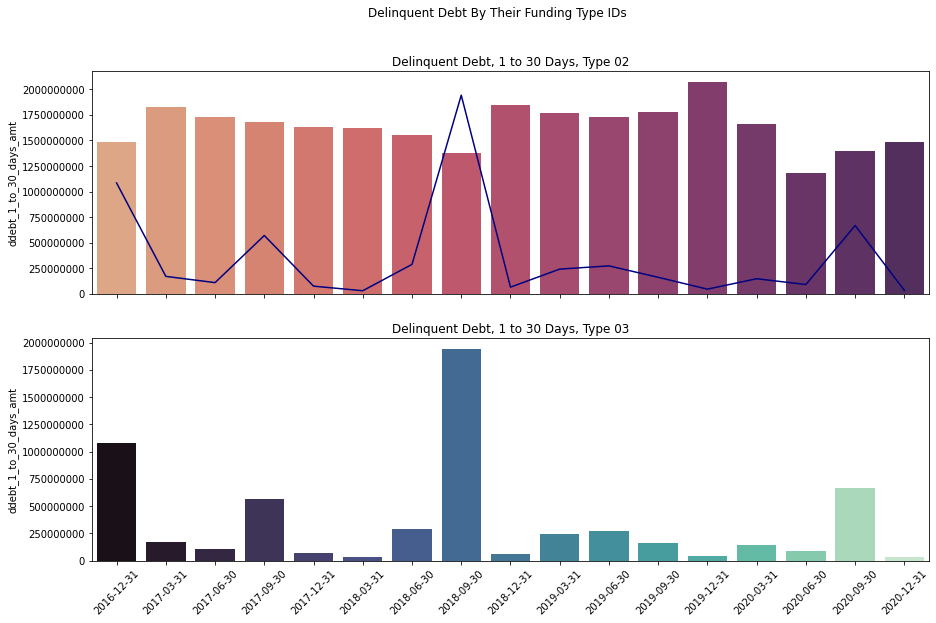

In [ ]:
# Set up the matplotlib figure
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 9), sharex=True)

#pulling off data to plot 
x = df['record_date'].unique()
y1 = df_type_2['ddebt_1_to_30_days_amt']
y2 = df_type_3['ddebt_1_to_30_days_amt']

#plotting
sns.lineplot(x=x, y=y2, color="navy", ax=ax1).set(title='Delinquent Debt, 1 to 30 Days, Type 02')
sns.barplot(x=x, y=y1, palette='flare', ax=ax1).set(title='Delinquent Debt, 1 to 30 Days, Type 02')
sns.barplot(x=x, y=y2, palette="mako", ax=ax2).set(title='Delinquent Debt, 1 to 30 Days, Type 03')

#settings 
f.suptitle("Delinquent Debt By Their Funding Type IDs")
ax1.ticklabel_format(style='plain', axis='y')
ax2.ticklabel_format(style='plain', axis='y')
ax1.fill
plt.xticks(rotation=45);

## Week 8 Homework Challenge:

You should have a pretty good idea at this point that there are dozens and dozens (if not thousands) of ways to plot and display data. You can scroll down to the optional week 9 below and see some interactive plots as well. 

Here's your challenge: create a stacked bar plot using the same data we used above. Meaning, for ```2016-12-31``` I want to see both the ```Type 02``` and ```Type 03``` dollars one on top of another in different colors. 

[Follow the matplotlib instructions here.](https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_stacked.html#sphx-glr-gallery-lines-bars-and-markers-bar-stacked-py) I frequently will just open the gallery example of the plot I want to create, so following along with their example code will help you learn how to do it without having to try to hack away at it from scratch. Admittedly, I still find plotting kind of difficult, so don't worry if it's a little challening at first! You could also make the stacked plot in ```seaborn``` if you want.

------------
------------


# Optional Weeks: 9 - 11

If time allows, feel free to continue working through the below examples in class. If not, students can read this on their own time if they want!

However, week 11 is some best practices for working with notebooks. There's no code, so definitely read through that quickly if you can.

## Week 9 - Interactive Plotting

Part of your syllabus work is focused around Tableau. Typically, students find that fairly straight forward, so we can turn our attention to some interactive examples in Python. Again, the power of BI tools like Tableau and PowerBI is that they have a relatively low learning curve and you can start plotting interactive visuals right out of the box. However, you usually have pretty limited access to *what* you can change on the plots. With libraries like ```altair``` and ```Bokeh```, you can make interactive plots in Python that can sit right in your notebook. These are new libraries to me, but this is a cool example of finding a new library and trying out new features to see what you can do in Python.

First, we can try Altair (docs [HERE](https://altair-viz.github.io/)). The plotting syntax is somewhat similar to Seaborn, with x and y arguments, along with a color argument that can be used to dynamically change the color based on a category in your dataset.  [HERE](https://altair-viz.github.io/gallery/scatter_tooltips.html#gallery-scatter-tooltips) is the example I followed to build the interactive Altair plot.

We supply x and y arguments, then set the color by the categorical variable ```receivable_type_id```. Maybe the coolest part, we set the tooltips that show up when you hover over the points with a list of columns in the dataset. Have your mentor (or whoever is presenting this) hover over the bubbles and see what they show! Last, we set the chart and point size.  

In [ ]:
import altair as alt

(alt.Chart(df)
    .mark_point()
    .encode(
    x='ddebt_1_to_30_days_amt',
    y='ddebt_1_to_30_days_cnt',
    color='receivable_type_id',
    tooltip=['record_date','funding_type_id','funding_type_description','src_line_nbr']
    ).interactive()
    .properties(width=500, height=500)
    .configure_point(size=200))

alt.Chart(...)

We have each individual element plotted, but what if we wanted to summarize everything and view the aggregates over the time period? Let's try grouping the dollars by ```receivable_type_id``` and see how it plots. 

In [ ]:
df[['ddebt_1_to_30_days_amt','ddebt_1_to_30_days_cnt','receivable_type_id']].groupby(['receivable_type_id']).sum()

,ddebt_1_to_30_days_amt,ddebt_1_to_30_days_cnt
receivable_type_id,,
A,33831185310,23764633
D,7094749225,85405842
F,2751270552,1166471


[HERE](https://docs.bokeh.org/en/latest/docs/gallery.html#notebook-examples) are some Bokeh examples that I followed along to make the below. This one is a little more complicated, and honestly took me quite a while to make, so don't feel bad if you find the syntax confusing. 

Essentially, we make a figure object, then put a scatter plot on top of it. The difference here is I just made the ```source``` argument our groupby selection from above rather than using an intermediate variable to do so (excuse the very long line of code). Then, I used the ```factor_cmap``` and ```factor_mark``` functions from Bokeh to color and style the points as different shapes. 

Remember, just use this as a general example, and feel free to follow along in the plotting library's examples when you need to make your own. In this class, since we want you to use more advanced programming skills, try out the different plotting options and see how much data you can clearly present and communicate with a few plots!

In [ ]:

#make sure you select the fourth button down on the right to scroll out 
#so  you can see all the data points
TYPES = df.receivable_type_id.unique()
MARKERS = ['hex', 'circle_x', 'triangle']

p = figure(title = "Debt by Type", background_fill_color="#fafafa")
p.xaxis.axis_label = 'Count of Receivables'
p.yaxis.axis_label = 'Total Debt'

p.scatter("ddebt_1_to_30_days_amt", "ddebt_1_to_30_days_cnt", 
          source=df[['ddebt_1_to_30_days_amt','ddebt_1_to_30_days_cnt','receivable_type_id']].groupby(['receivable_type_id']).sum(),
          legend_group="receivable_type_id", fill_alpha=0.4, size=12,
          marker=factor_mark('receivable_type_id', MARKERS,TYPES),
          color=factor_cmap('receivable_type_id','Category10_3',TYPES))

p.legend.location = "top_left"
p.legend.title = "Receivable Type"

# below commands will render it in the Notebook
output_notebook()
show(p)

## Week 10

Let's do some math. Don't worry, we'll walk through it line by line 😀 There are different mathematical ways to fit a line to data points. You can get into the details if you want to, or you can just use the default methods that SciPy uses behind the scenes. 

To "fit" the line to the data points you have, you want to minimize the errors. That is, the distance from the data points to the "best fitting" line that you can draw through theme. The formula for finding the smallest error looks like this: 

Least Squared Error = $\sum_{i=1}^{n} (y_i - \bar{y})^2$

And we want the line $y = \beta_1 x + \beta_0 + ϵ$ which is just the same as $y = mx + b$ that you might be used to seeing from algebra. Here, $\beta_1$ is the slope of the line, $\beta_0$ is the y-intercept, and $ϵ$ is the error that we want to minimize, hence the name "Least Squared Errors". 

If you're not familiar with this, not to worry! Here are a couple great videos on the subject: 

[Khan Academy Video](https://www.youtube.com/watch?v=yMgFHbjbAW8)

[Z Statistics Video](https://www.youtube.com/watch?v=aq8VU5KLmkY)

### Math Notation Side Note

You'll see notation like this a lot, so let's take a moment to explain it. When you see a capital Sigma, $\Sigma$, this just means sum. It's actually basically the mathematical notation version of a for loop. So here's an example: 

$\Sigma_{i=0}^{3} x_i =x_1 + x_2 + x_3$

is the same thing as saying: 

```python
data = [x1,x2,x3]
total = 0 
for i in data:
  total += i

total
```

That's it! The Sigma notation just means "sum everything while iterating by the index each time". It's just a compact way to write things, especially if you have hundreds of data points or more. 

Now we can perform a regression, with [Linregress documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html) from SciPy here. *(Note: depending on your version of SciPy, the tuple returned from linregress may have different names / values. CoLab is using version 1.4 but if you just installed it, you probably have version >= 1.8)*

We can just use the ```scipy.stats.linregress``` module that we imported earlier, supply x and y arguments, and get everything we need into the ```result``` variable. 

In [ ]:
x = df['cs_referred_total_cnt']
y = df['cs_referred_total_amt']

result = linregress(x, y)
result

LinregressResult(slope=247.57752204501278, intercept=44377617.90991765, rvalue=0.9335120319124705, pvalue=1.90488122280419e-45, stderr=9.605571830982491)

Great, we can see that this ```result``` object is a tuple with a bunch of different values. Importantly, for plotting our line, it has the slope and intercept. I picked two random columns called ```cs_referred_total_cnt``` and ```cs_referred_total_amt``` which have something to do with debt referred to the Treasury for cross servicing. 

Here's a basic plot that we're familiar with, just a standard matplotlib scatter plot.

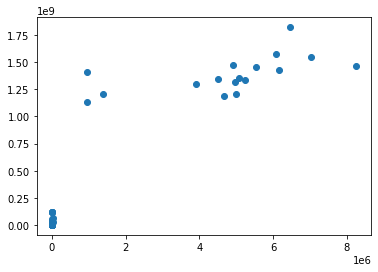

In [ ]:
plt.plot(x,y,'o');

Now, we can plot the same thing, along with our line as the second argument, following the formula we mentioned above of $y = \beta_1 x + \beta_0$ (Note: we don't actually plot the error). Then, we add a few matplotlib options to display the plot and print out our formula, and we're done!

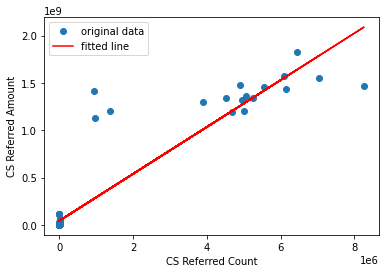

y = 247.57752204501278 * x  + 44377617.90991765


In [ ]:
#plotting our base plot then plotting the lin reg.
plt.plot(x,y,'o',label='original data')
plt.plot(x, result.intercept + result.slope*x, 'r', label='fitted line') 

#labels, showing the plot, and printing the formula of our line.
plt.xlabel('CS Referred Count')
plt.ylabel('CS Referred Amount')
plt.legend()
plt.show()
print(f"y = {result.slope} * x  + {result.intercept}")

## Interpretation 

Sometimes you'll hear ```y``` called the dependent variable and ```x``` the explanatory variable. That is, changes in ```x``` should explain changes in  ```y```. 

We can now test a point on our line to say the "theoretical" amount of debt that we should see with a count of 4,000,000. I just chose these values at random, but you can see below the point is right on our line. If someone asked you "how much debt would we expect to see with a count of 4,000,000?" you could answer by feeding that into the regression formula and seeing that the result is about $1 billion. Now, there's a ton more that we can't cover in this class, but if you want to learn more, any statistics textbook or machine learning book on applied regression should help you along!

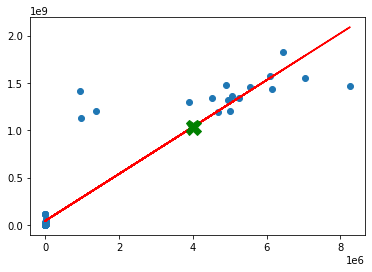

In [ ]:
x_test = 4000000
y_test =248 * 4000000  + 44377617

plt.plot(x,y,'o',label='original data')
plt.plot(x, result.intercept + result.slope*x, 'r', label='fitted line') 
plt.plot([x_test],[y_test],marker='X',markersize=15,markerfacecolor='green',markeredgecolor='green')

## Week 11 - Best Practices and Wrapping Up 

We've written enough code at this point, so let's talk about writing *clean* code. First, though, understand that this is a goal that we should all be working towards our entire careers and it's likely that everyone's code will have some areas for improvement here and there. Here's a pretty nice article I found discussing just that: [Article from Ploomber](https://ploomber.io/blog/clean-nbs/). The bullet points they have are below, and I'll give my thoughts on them and how they relate to this project (and how they will relate to your project) under the points. 

Also, working with Jupyter Notebooks (locally or especially on CoLab) presents its own unique challenges than if you were writing a package of .py files. They're organized differently and you really should try both "styles" of writing Python to see what I mean. I think many of the problems with "bad" code in a Jupyter Notebook can be fixed if we approach it more as a reusable piece of code than something we write in a few days from top to bottom, never to look at again. 

1. Lock dependencies
  - utilizing a requirements.txt is a great idea. The trick is that many, if not all, of the things you all are using at this point in your Python journey will remain mostly the same over many, many different versions of a library, so you may not run into something breaking in a new version. Still, it's a great way  to make sure your code will run in the future.

2. Package your project
  - For the sake of the exercise, in week 4, you saw how we defined a function to clean our data. However, what if we want to use this in another file? We'd have to copy and paste it into that notebook (or run this notebook in another notebook, which can be done, but seems kind of sloppy) which introduces the possibility of bugs. Of course, the function runs just fine if we're only using it here, but if you want to manage your functions easier, put them in their own file and import them!
3. Modularize code
  - I actually don't know much about this, so read what the article has to say!
4. Be careful with mutable data structures
  - Extremely important, so also read what they have to say. It's very common to grade a student's project and see that they've modified a DataFrame out of order which results in code failing or unintended changes. The article has some smart approaches to get around this, but if you're new to Jupyter Notebooks, just try running ALL of your code from top to bottom and see if the output is the same as you remember when you wrote it the first time.
5. Auto-reload code from external modules
  - this is a slight quirk that you might not come accross, but still useful.
6. Unit testing
  - Unit testing is really cool, in my opinion, because it prevents you from making simple mistakes that would be very difficult to catch otherwise. Really, this is only going to be a "big deal" to you if you're writing more than a couple functions or classes. You're not going to write a test for ```pandas.DataFrame.sum()```, for example, because we trust that it works because the developers of Pandas have tests for that code! Of course, this won't prevent every possible error, which is why [Pandas](https://github.com/pandas-dev/pandas/issues) has 3,400 open issues on GitHub!
7. Organize in sections
  - Study this section and use it in your own project. This states it better than I could with a nice graphic, and explains why I keep bringing up the organization of your notebook. This bullet point is *mostly* what makes up requirement #5 on your project requirements for the class.
8. Use a code linter
  - Honestly I need to use linters more, so I really can't say much here. However, there are tons of popular tools for this, most of which are built into or can be installed in your IDE of choice. 
9. Use a code auto-formatter
  - The de-facto formatter, [Black](https://black.readthedocs.io/en/stable/) is maintained by the Python Software Foundation and auto-formats your code. Though, I'm not sure if this will work with .ipynb's, so you may have to convert it to a .py file to see the effects, which you can do by downloading it as a .py file. 
10. Write shorter notebooks
  - This is an interesting suggestion, and people probably debate this heavily, but it most likely comes down to personal choice and how you think you can communicate your data most effectively. 


Whew! At this point, you should have a good understanding of what your project should look like (if you go the route of a data analysis project) and what will make it a *good* project. As always, reach out to your mentors with any questions, and I hope you enjoyed this example project!